# Percolation cluster stats

In [1]:
%matplotlib widget

from os import path
import pickle
import numpy as np
from numba import njit
from qcnico.plt_utils import histogram

#@njit
def get_dcrits(run_inds,temps,datadir):
    nsamples = len(run_inds)
    ntemps = len(temps)
    dcrits = np.zeros((nsamples,ntemps))
    for k in range(nsamples):
        for l in range(ntemps):
            sampdir = f"sample-{run_inds[k]}"
            pkl = f"out_percolate-{temps[l]}K.pkl"
            fo = open(path.join(datadir,sampdir,pkl),'rb')
            dat = pickle.load(fo)
            dcrits[k,l] = dat[1]
            fo.close()

    return dcrits

datadir=path.expanduser("~/Desktop/simulation_outputs/percolation/40x40/percolate_output")
fgood_runs = path.join(datadir, 'good_runs.txt')
with open(fgood_runs) as fo:
    lines = fo.readlines()

#gr_inds = list(map(int,[line.rstrip().lstrip().split('-')[1] for line in lines]))
gr_inds = list(map(int,[line.rstrip().lstrip() for line in lines]))

# temps = np.arange(0,1050,50)
# temps[0] = 10
temps = np.arange(40,440,10)

dcrits = get_dcrits(gr_inds,temps, datadir)
print(dcrits.shape)

davg_T = np.mean(dcrits,axis=0)
dstd_T = np.std(dcrits,axis=0)
print(davg_T.shape)




(174, 40)
(40,)


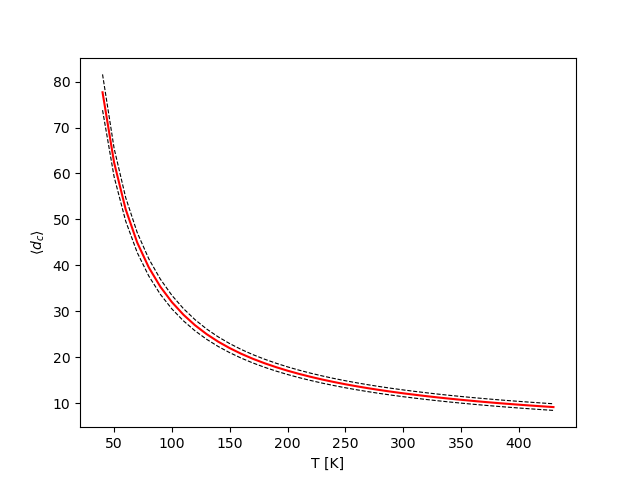

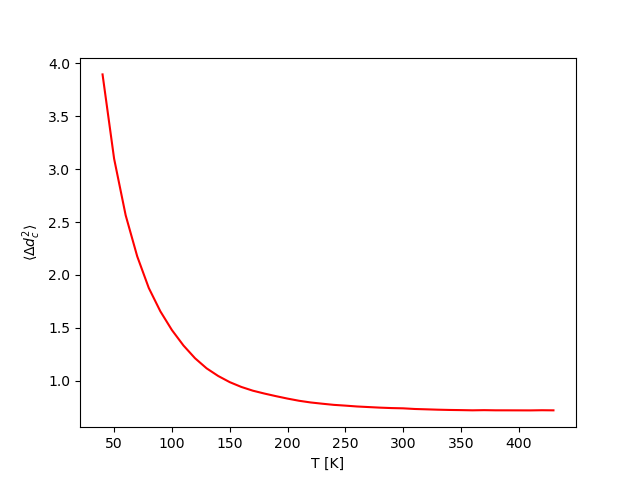

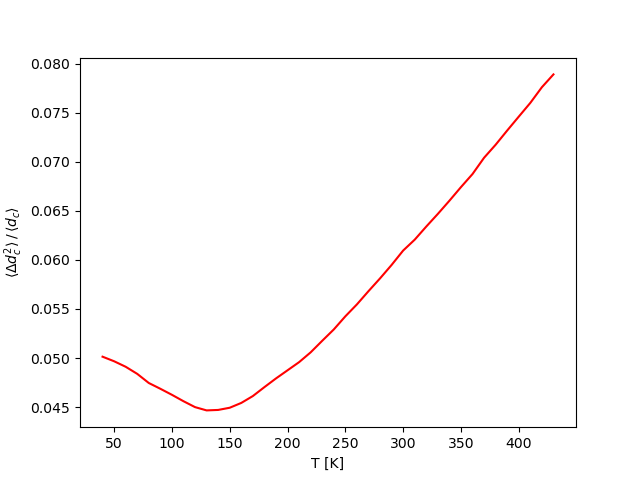

[3.89477851 3.09858789 2.56371076 2.17538811 1.87680265 1.65648401
 1.4794     1.33343284 1.21308078 1.11788992 1.04569995 0.9874834
 0.94221725 0.90666458 0.87953023 0.85494974 0.83191007 0.81136897
 0.79541105 0.78363976 0.7727588  0.76554721 0.75749249 0.75194055
 0.74647027 0.74240652 0.73998513 0.73380904 0.73057295 0.72715
 0.72468649 0.7231399  0.72117987 0.72280711 0.72119635 0.72106682
 0.72076979 0.72043411 0.72201721 0.72097268]


In [2]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(temps,davg_T,'r-')
ax.plot(temps,davg_T+dstd_T,'k--',lw=0.8)
ax.plot(temps,davg_T-dstd_T,'k--',lw=0.8)
ax.set_xlabel('T [K]')
ax.set_ylabel('$\langle d_{c}\\rangle$')
plt.show()

fig, ax = plt.subplots()
ax.plot(temps,dstd_T,'r-')
ax.set_xlabel('T [K]')
ax.set_ylabel('$\langle \Delta d_c^2\\rangle$')
plt.show()

fig, ax = plt.subplots()
ax.plot(temps,dstd_T/davg_T,'r-')
ax.set_xlabel('T [K]')
ax.set_ylabel('$\langle \Delta d_c^2\\rangle\,/\,\langle d_{c}\\rangle$')
plt.show()


print(dstd_T)

[10 15 20 25 30 35]
[plt_utils.histogram] dx = 0.24711855931649582
[plt_utils.histogram] dx = 0.20624090768818099
[plt_utils.histogram] dx = 0.18824629407285337
[plt_utils.histogram] dx = 0.18209965779101112
[plt_utils.histogram] dx = 0.1726933328814254
[plt_utils.histogram] dx = 0.1641922195103026


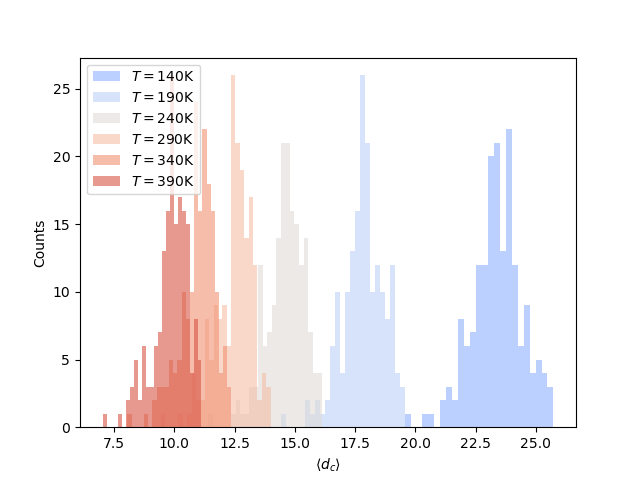

In [3]:
from qcnico import plt_utils

Tcm = plt_utils.get_cm(temps,'coolwarm',max_val=1.0)

fig, ax = plt.subplots()

plot_inds = np.arange(10,40,5)
print(plot_inds)

for n in plot_inds:
    plt_utils.histogram(dcrits[:,n],nbins=25,show=False, normalised=False, plt_objs=(fig,ax),
        plt_kwargs={'alpha': 0.6, 'color': Tcm[n], 'label': f'$T = {temps[n]}$K'})
ax.set_xlabel('$\langle d_{c}\\rangle$')
plt.legend()
plt.show()

In [4]:
def get_sigma(dcrits,nbins=30):
    hist, bin_edges = np.histogram(dcrits,bins=nbins,density=True)
    bin_inds = np.sum(dcrits[:,None] > bin_edges,axis=1) - 1
    f = hist[bin_inds] * np.exp(-dcrits)
    return np.max(f)

sigmas = np.array([get_sigma(d) for d in dcrits.T])
print(sigmas.shape)
dat = np.vstack((temps, sigmas))
print(dat)
np.save("sigma_v_T.npy",dat)

(40,)
[[4.00000000e+01 5.00000000e+01 6.00000000e+01 7.00000000e+01
  8.00000000e+01 9.00000000e+01 1.00000000e+02 1.10000000e+02
  1.20000000e+02 1.30000000e+02 1.40000000e+02 1.50000000e+02
  1.60000000e+02 1.70000000e+02 1.80000000e+02 1.90000000e+02
  2.00000000e+02 2.10000000e+02 2.20000000e+02 2.30000000e+02
  2.40000000e+02 2.50000000e+02 2.60000000e+02 2.70000000e+02
  2.80000000e+02 2.90000000e+02 3.00000000e+02 3.10000000e+02
  3.20000000e+02 3.30000000e+02 3.40000000e+02 3.50000000e+02
  3.60000000e+02 3.70000000e+02 3.80000000e+02 3.90000000e+02
  4.00000000e+02 4.10000000e+02 4.20000000e+02 4.30000000e+02]
 [5.06083810e-32 3.72831341e-26 3.84252361e-22 3.19445550e-19
  2.34482389e-17 2.43253788e-15 8.43593249e-14 1.08399830e-12
  9.26719161e-12 5.74151707e-11 2.70628690e-10 1.04180727e-09
  3.40807588e-09 9.68961501e-09 2.43868476e-08 3.69460421e-08
  1.16701553e-07 1.51791369e-07 2.79275278e-07 7.29496129e-07
  1.62906272e-06 2.61029624e-06 3.99326827e-06 5.94952036e-06
 

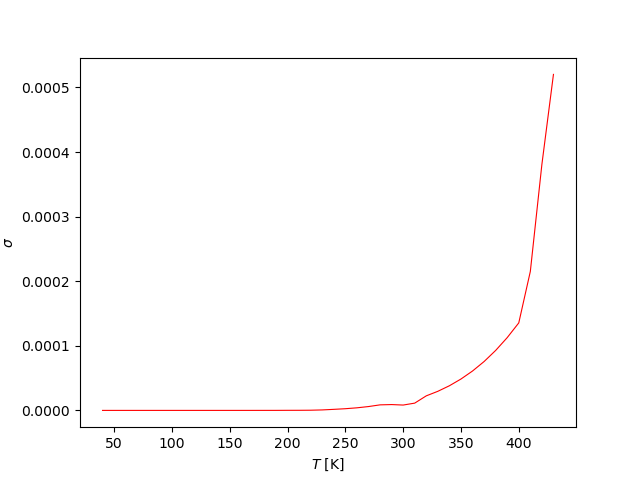

In [5]:
fig, ax  = plt.subplots()

ax.plot(temps,sigmas,'r-',lw=0.8)
ax.set_xlabel('$T$ [K]')
ax.set_ylabel('$\sigma$')
plt.show()

0D Mott VRH: slope = -2841.7962507471643, r^2 = 0.9994915288678949


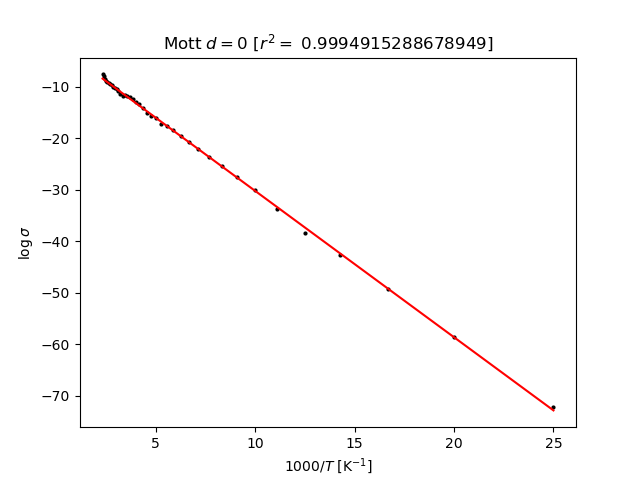

2D Mott VRH: slope = -4578017.71265549, r^2 = 0.776439285313586


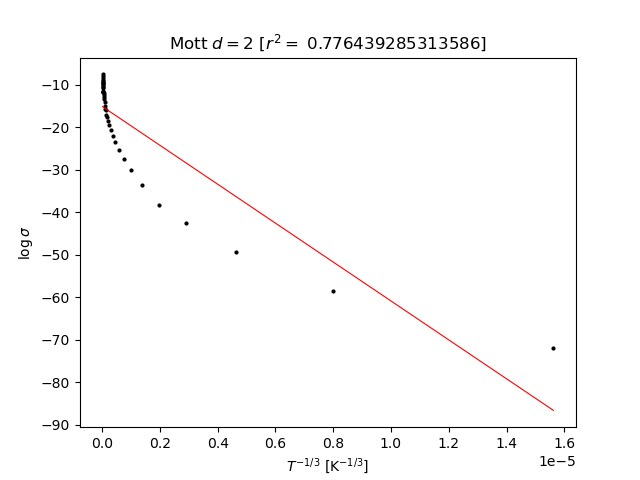

RCH: slope = 21.716979389333687, r^2 = 0.8990147919494732


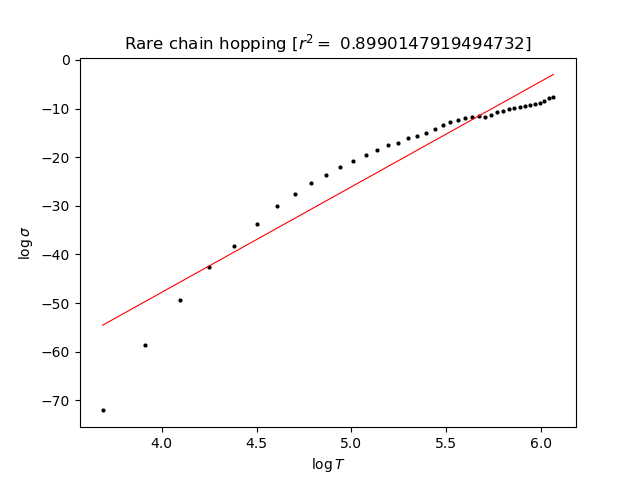

In [6]:
from scipy.stats import linregress

# Do Mott linear regression d = 0
slope, intercept, r, *_ = linregress(1.0/temps, np.log(sigmas))
print(f'0D Mott VRH: slope = {slope}, r^2 = {r**2}')
fig, ax = plt.subplots()
ax.plot((1000.0/temps),np.log(sigmas),'ko',ms=2.0)
ax.plot((1000.0/temps), (1.0/temps)*slope + intercept,'r-')
ax.set_xlabel("$1000/T$ [K$^{-1}$]")
ax.set_ylabel("$\log \sigma$")
#ax.set_yscale('log')
ax.set_title(f'Mott $d=0$ [$r^2 = $ {r**2}]')
plt.show()

# Do Mott linear regression d = 2
x = np.power(1.0/temps,3)
slope, intercept, r, *_ = linregress(x, np.log(sigmas))
print(f'2D Mott VRH: slope = {slope}, r^2 = {r**2}')
fig, ax = plt.subplots()
ax.plot(x,np.log(sigmas),'ko',ms=2.0)
ax.plot(x,intercept + slope*x,'r-',lw=0.8)
ax.set_xlabel("$T^{-1/3}$ [K$^{-1/3}$]")
ax.set_ylabel("$\log \sigma$")
#ax.set_yscale('log')
ax.set_title(f'Mott $d=2$ [$r^2 = $ {r**2}]')
plt.show()

# Do RCH linear regression
x = np.log(temps)
slope, intercept, r, *_ = linregress(x, np.log(sigmas))
print(f'RCH: slope = {slope}, r^2 = {r**2}')
fig, ax = plt.subplots()
ax.plot(x,np.log(sigmas),'ko',ms=2.0)
ax.plot(x,intercept + slope*x,'r-',lw=0.8)
ax.set_xlabel("$\log T$")
ax.set_ylabel("$\log \sigma$")
#ax.set_yscale('log')
ax.set_title(f'Rare chain hopping [$r^2 = $ {r**2}]')
plt.show()


In [7]:
def get_cluster_stats(run_inds,temps,datadir):
    nsamples = len(run_inds)
    ntemps = len(temps)
    avg_sizes = np.zeros((nsamples,ntemps),dtype=int)
    min_sizes = np.zeros((nsamples,ntemps),dtype=int)
    max_sizes = np.zeros((nsamples,ntemps),dtype=int)
    nclusters = np.zeros((nsamples,ntemps),dtype=int)
    for k in range(nsamples):
        #print(f"******* {run_inds[k]} *******")
        for l in range(ntemps):
            sampdir = f"sample-{run_inds[k]}"
            pkl = f"out_percolate-{temps[l]}K.pkl"
            fo = open(path.join(datadir,sampdir,pkl),'rb')
            dat = pickle.load(fo)
            clusters = dat[0]
            #print(f"T = {temps[l]}K: ",clusters)
            nclusters[k,l] = len(clusters)
            if len(clusters) == 0:
                sizes = 0
                print(run_inds[k], temps[l])
            else:
                sizes = np.array([len(c) for c in clusters])
            avg_sizes[k,l] = np.mean(sizes)
            min_sizes[k,l] = np.min(sizes)
            max_sizes[k,l] = np.max(sizes)
            fo.close()
            #print('\n')

    return nclusters, avg_sizes, min_sizes, max_sizes

nclusters, avgs, maxs, mins = get_cluster_stats(gr_inds,temps,datadir)

80 220
123 110
233 290
249 230
249 360
249 370
299 240


In [8]:
print('Only single clusters found: ', np.all(nclusters<2))

# There is only one cluster per sample at each temperature
sizes = avgs
avgs = np.mean(sizes,axis=0)
stds = np.std(sizes,axis=0)



Only single clusters found:  True


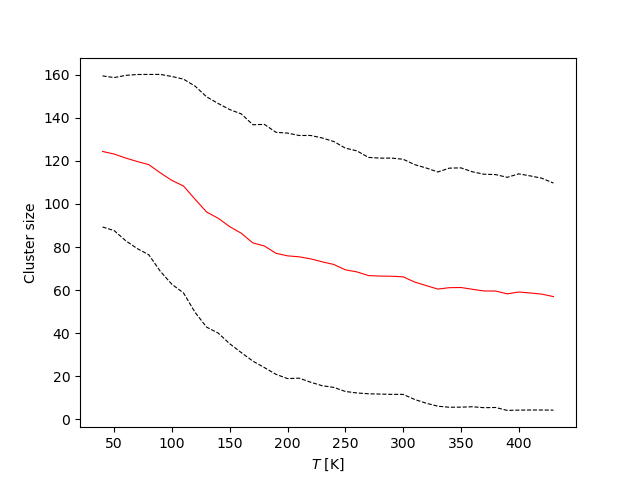

In [9]:
fig, ax = plt.subplots()
ax.plot(temps, avgs,'r-',lw=0.8)
ax.plot(temps, avgs + stds,'k--',lw=0.8)
ax.plot(temps, avgs - stds,'k--',lw=0.8)
ax.set_xlabel("$T$ [K]")
ax.set_ylabel("Cluster size")
plt.show()

[ 0 10 20 30 39]
[plt_utils.histogram] dx = 8.32
[plt_utils.histogram] dx = 8.12
[plt_utils.histogram] dx = 7.68
[plt_utils.histogram] dx = 8.48
[plt_utils.histogram] dx = 8.48


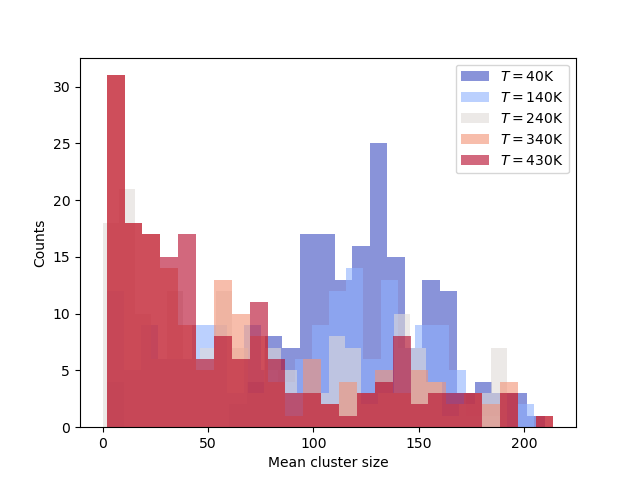

In [10]:
Tcm = plt_utils.get_cm(temps,'coolwarm',max_val=1.0)

fig, ax = plt.subplots()

plot_inds = np.arange(0,50,10)
plot_inds[-1] = 39
print(plot_inds)

for n in plot_inds:
    plt_utils.histogram(sizes[:,n],nbins=25,show=False, normalised=False, plt_objs=(fig,ax),
        plt_kwargs={'alpha': 0.6, 'color': Tcm[n], 'label': f'$T = {temps[n]}$K'})
ax.set_xlabel('Mean cluster size')
plt.legend()
plt.show()

In [20]:
from percolate import plot_cluster, generate_site_list
from qcnico.coords_io import read_xsf

def get_data(run_ind,temp,datadir):
    #nsamples = len(run_inds)
    #ntemps = len(temps)
    sampdir = f"sample-{run_ind}"
    pkl = f"out_percolate-{temp}K.pkl"
    fo = open(path.join(datadir,sampdir,pkl),'rb')
    dat = pickle.load(fo)
    fo.close()
    return dat

tiny_cluster_inds = np.vstack((sizes == 2).nonzero())
print(tiny_cluster_inds)

gr_inds = np.array(gr_inds)

tiny_cluster_structures = gr_inds[np.unique(tiny_cluster_inds[0])]
#print(tiny_cluster_structures)

posdir = path.join(path.dirname(datadir), 'structures')
Mdir = path.join(path.dirname(datadir), 'MOs_ARPACK')
edir = path.join(path.dirname(datadir), 'eARPACK')

for nn in tiny_cluster_structures:
    T_ind = tiny_cluster_inds[1,(tiny_cluster_structures == nn).nonzero()[0][0]]
    print(T_ind)
    posfile = path.join(posdir,f'bigMAC-{nn}_relaxed.xsf')
    Mfile = path.join(Mdir,f'MOs_ARPACK_bigMAC-{nn}.npy')
    efile = path.join(edir, f'eARPACK_bigMAC-{n}.npy')
    M = np.load(Mfile)
    energies = np.load(efile)
    T = temps[T_ind]
    dat = get_data(nn,T,datadir)
    c = dat[0][0]
    print(c)
    A = dat[2]
    pos, _ = read_xsf(posfile)
    centres, ee, MOinds = generate_site_list(pos, M, energies)
    plot_cluster(c,pos,M,A,show_densities=True, dotsize=1.0, usetex=False, show=True, centers=centres, inds=MOinds)

ImportError: cannot import name 'generate_site_list' from 'percolate' (/Users/nico/Desktop/scripts/percolate_mac/percolate.py)

<class 'numpy.ndarray'>
<class 'list'>
